<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Ice-age dynamics: 3. Dating
## Decay series
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we use the equations on **radioactive decay series** derived in the lecture
and play with `python` to plot the decay time series.

We first initialize the `python` libraries.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

----
## Decay series

The solutions to the differential equations for **parent**- and **daugther**-isotopes, $P(t)$ and $D(t)$, read:
$$
\begin{array}{rcl}
P_1(t) & = & P_1^0 e^{\displaystyle -\lambda_1 t} \\
P_2(t) & = & \frac{\displaystyle \lambda_1}{\displaystyle \lambda_1 - \lambda_2} P_1^0 \left( e^{\displaystyle -\lambda_1 t} - e^{\displaystyle -\lambda_2 t} \right)
            + P_2^0 e^{\displaystyle -\lambda_2 t} \\
D(t) & = & P_1^0 \left( 1 
                     - \frac{\displaystyle \lambda_2}{\displaystyle \lambda_2 - \lambda_1} e^{\displaystyle -\lambda_1 t} 
                     - \frac{\displaystyle \lambda_1}{\displaystyle \lambda_1 - \lambda_2} e^{\displaystyle -\lambda_2 t}
                \right)
\end{array}
$$

- Define the three equations as function `n1n2n3()`
- Embed in `ipywidgets` for interactive use

In [17]:
def n1n2n3(thalf1,thalf2):
    # define solutions for parent and daughter isotopes
    lambda1 = np.log(2)/thalf1
    lambda2 = np.log(2)/thalf2
    if (lambda1 == lambda2):
        lambda2 = 0.99*lambda2
    t = np.linspace(0,50, num=100)
    n1 = 100*np.e**(-lambda1*t)
    n2 = 100*lambda1/(lambda2-lambda1)*(np.e**(-lambda1*t) - np.e**(-lambda2*t))
    n3 = 100*(1 - lambda2/(lambda2-lambda1)*np.e**(-lambda1*t) - lambda1/(lambda1-lambda2)*np.e**(-lambda2*t))
    # call plotting functions
    plt.figure(figsize=(10.0, 6.0))
    plt.title('Decay series')
    plt.xlim([0,50])
    plt.xlabel('Time [h]')
    plt.ylim([-5,105])
    plt.ylabel('Amount [%]')
    plt.plot(t,n1,linewidth=2,color='red',label='P$_1$(t)')
    plt.plot(t,n2,linewidth=2,color='green',label='P$_2$(t)')
    plt.plot(t,n3,linewidth=2,color='blue',label='P$_3$(t)')
    plt.legend(loc='center right')
    plt.grid()

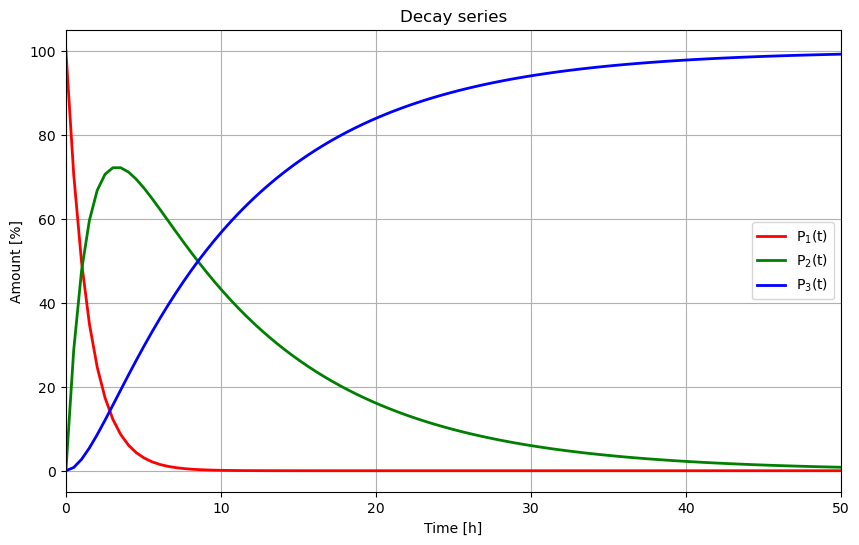

In [18]:
n1n2n3(1,7)

In [19]:
# call interactive module
interactive_plot = widgets.interactive(n1n2n3,
    thalf1=widgets.FloatSlider(min=0.1,max=10.0,step=0.1,value=1.00,description='$t^1_{1/2}$'),
    thalf2=widgets.FloatSlider(min=0.1,max=10.0,step=0.1,value=7.00,description='$t^2_{1/2}$'))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='$t^1_{1/2}$', max=10.0, min=0.1), FloatSlider(value=…

Note the two lines in the function `n1n2n3` commented out (the if clause). Try in the example above to set both half-lives to the same value. The program will crash, because for $t^1_{1/2}=t^2_{1/2}$, there will be a division through zero in the denominator (check the equations above!). We avoid this problem by checking, if this situation arises, then slightly changing one of the values (by 1%). 